<a href="https://colab.research.google.com/github/SLMath/DAPython/blob/main/ML_Pycaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="#FF8080">Aviso: o código demora cerca de 40 minutos para conclusão, e é necessário confirmar o tipo das variáveis após a chamada da função setup</font>



# OBJETIVO: predição do gasto do plano de saúde com um novo cliente

### Baseado em dados colhidos de clientes anteriores, definir um modelo preditivo para o gasto do plano de saúde.

Vou explorar a biblioteca `pycaret` para treinar e comparar diferentes modelos.
Esta lib disponibiliza datasets para analise assim como muitas ferramentas de Machine Learning.

In [ ]:
!pip install pycaret

# Preparar Dados

Carregando dados sobre os gastos de um seguro com uma pessoa descrita por:
- idade,
- sexo,
- indice de massa corporal,
- se é fumante,
- localização

In [ ]:
from pycaret.datasets import get_data

insuranceData = get_data('insurance', verbose=False);
insuranceData

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Configurando a lib para tratar os dados conforme desejado

In [ ]:
from pycaret.regression import *

# ?setup # to get info about all possible parameters
dataSetup = setup(
    data = insuranceData,       # all data set: training and testinng
    target = 'charges',         # label: which field is the outcome
    normalize = True,           # applying statistics to reduce the numerical features range
    combine_rare_levels = True, # gather class-values on categoric features that appear too few times into a single category
    remove_outliers = True,     # ignore sample which is statistically too far from the others
    verbose=False
);

Text(value="Following data types have been inferred automatically, if they are correct press enter to continue…

,Data Type
age,Numeric
sex,Categorical
bmi,Numeric
children,Categorical
smoker,Categorical
region,Categorical
charges,Label


# Treinar um Modelo aleatório

Exibe os índices de performance para os 10 folders (default do setup) que são conjunto de dados para treinamento usados para diminuir a variância do treinamento.

In [ ]:
# model() # display all possible models
rfModel = create_model('rf');
print();

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2802.4022,2.756680e+07,5250.4094,0.7091,0.4838,0.3939
1,3535.7484,3.900551e+07,6245.4394,0.7693,0.5478,0.3849
2,2117.4975,1.893857e+07,4351.8469,0.8461,0.4868,0.2621
3,3182.8039,3.371945e+07,5806.8454,0.7514,0.4893,0.3177
4,2697.8067,2.189681e+07,4679.4025,0.8432,0.4847,0.3239
5,2106.0348,1.341011e+07,3661.9810,0.8825,0.4365,0.3535
6,3301.7657,2.986339e+07,5464.7402,0.7340,0.5404,0.3607
7,3213.2447,3.134105e+07,5598.3078,0.7585,0.5554,0.4545
8,2256.2142,1.817334e+07,4263.0200,0.8472,0.4518,0.3490
9,2486.6888,2.037152e+07,4513.4819,0.8700,0.4497,0.2722


A média do RMSE (root mean square) está proxima a 5000.

In [ ]:
meanCharges = insuranceData['charges'].mean();
print('charges average: ${:.2f}'.format(meanCharges));

valueRMSE = 5000;
print('deviation: {:.1f}%'.format(100 * valueRMSE / meanCharges));

charges average: $13270.42
deviation: 37.7%


O desvio(erro) é muito alto próximo a 37,7%. Então tentamos diminuir esse valor treinando o modelo para otimizar o valor de RMSE.

In [ ]:
print('Aplicando 20 Iterações')
rfModelTrained = tune_model(rfModel, optimize="RMSE", n_iter=20);

print()
print('Aplicando 40 Iterações')
rfModelTrained = tune_model(rfModel, optimize="RMSE", n_iter=40);

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1915.6373,2.341660e+07,4839.0704,0.7529,0.3359,0.1683
1,2759.4461,3.669309e+07,6057.4818,0.7830,0.4749,0.1818
2,1605.1993,1.676619e+07,4094.6541,0.8638,0.4212,0.1397
3,2454.4265,3.172272e+07,5632.2927,0.7661,0.4409,0.1714
4,1645.8440,1.594814e+07,3993.5118,0.8858,0.3917,0.1453
5,1402.2153,1.072337e+07,3274.6554,0.9060,0.3045,0.1547
6,2699.7918,3.053235e+07,5525.6089,0.7280,0.4957,0.1886
7,2184.7290,2.332640e+07,4829.7411,0.8202,0.4407,0.2380
8,1414.0887,1.214335e+07,3484.7310,0.8979,0.3137,0.1422
9,1858.1902,1.752709e+07,4186.5368,0.8881,0.4016,0.1574


RMSE caiu para próximo a 4640 com 20 iterações e 4590 com 40.

In [ ]:
valueRMSE_20it = 4640;
print('deviation for 20 iterations: {:.1f}%'.format(100 * valueRMSE_20it / meanCharges));
print();

valueRMSE_40it = 4590;
print('deviation for 40 iterations: {:.1f}%'.format(100 * valueRMSE_40it / meanCharges));

deviation for 20 iterations: 35.0%

deviation for 40 iterations: 34.6%


Os desvios percentuais ainda estão muito altos, porém é visível que há uma queda (otimização) entre as interações.

# Análise Exploratória das entradas (features)

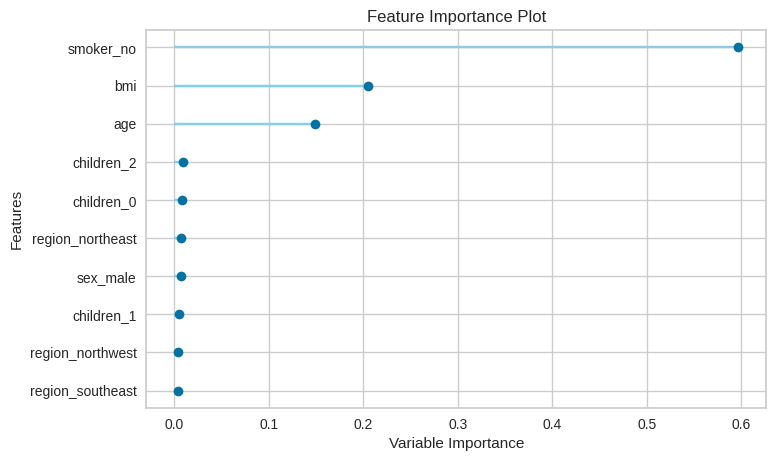

In [ ]:
plot_model(rfModel, plot='feature')

Observa-se claramente por esse gráfico que há gigantesca inflência quanto ao fato de ser fumante ou não, média influência do índice de massa corporal e da idade e pouquíssima do restante.

# Comparando diferente modelos

Seleciona os 3 modelos com melhor performance inicial do índice RMSE

In [ ]:
bestModelsRMSE = compare_models(sort="RMSE", n_select=3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2633.1988,2.282340e+07,4709.8545,0.8217,0.4468,0.3135,0.071
rf,Random Forest Regressor,2770.0207,2.542865e+07,4983.5475,0.8011,0.4926,0.3472,0.501
lightgbm,Light Gradient Boosting Machine,2966.3229,2.587133e+07,5023.6420,0.7981,0.5820,0.3867,0.088
ada,AdaBoost Regressor,3949.4336,2.730836e+07,5179.9780,0.7857,0.6072,0.6720,0.024
et,Extra Trees Regressor,2831.2883,2.934870e+07,5352.5463,0.7714,0.5065,0.3397,0.452
llar,Lasso Least Angle Regression,4075.1976,3.611849e+07,5967.3673,0.7199,0.5500,0.4187,0.015
lasso,Lasso Regression,4081.6160,3.618035e+07,5972.4951,0.7194,0.5422,0.4191,0.014
ridge,Ridge Regression,4093.4822,3.617892e+07,5972.6802,0.7195,0.5465,0.4216,0.013
br,Bayesian Ridge,4089.3228,3.618173e+07,5972.7984,0.7194,0.5444,0.4207,0.013
lr,Linear Regression,4081.8069,3.618491e+07,5972.8677,0.7194,0.5421,0.4190,0.012


Treinamento de todos os modelos selecionados e mesclagem dos modelos para aperfeiçoamento.
A escolha de 100 interações faz o processamento ser bem lento, porém garante um melor aperfeiçoamento.

In [ ]:
trainedModels = [tune_model(model, optimize="RMSE", n_iter=100, verbose=False) for model in bestModelsRMSE];
blendModels = blend_models(trainedModels);

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2441.2319,2.295620e+07,4791.2630,0.7578,0.4064,0.3085
1,3167.4086,3.579987e+07,5983.2991,0.7883,0.4941,0.2921
2,2026.3529,1.712750e+07,4138.5382,0.8609,0.4322,0.2254
3,2828.8648,3.107872e+07,5574.8289,0.7709,0.4451,0.2489
4,2297.7588,1.694546e+07,4116.4865,0.8786,0.4324,0.2738
5,1842.7793,1.214156e+07,3484.4737,0.8936,0.3768,0.2569
6,2874.4983,2.770116e+07,5263.1896,0.7533,0.4755,0.2454
7,2491.3827,2.299271e+07,4795.0714,0.8228,0.4242,0.2665
8,2003.2415,1.366573e+07,3696.7189,0.8851,0.3780,0.2616
9,2124.4002,1.742434e+07,4174.2475,0.8888,0.4107,0.2225


Mesmo procurando uma melhor otimização, no fim a mistura resultou num ínidice de 4597.6500, valor um tanto menor que o random forest anterior com 40 interações. Porém, com um desvio padrão entre `folders` um tanto menor. Usaremos, portanto, esse modelo para prosseguir com os testes.

In [ ]:
prediction = predict_model(blendModels);

print();
print('displaying some absolute error values');
error = prediction['Label'] - prediction['charges'];
display(error);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,2187.8966,1.811450e+07,4256.1133,0.888,0.3656,0.212



displaying some absolute error values


0      1595.128395
1      1301.573006
2       675.159841
3       182.759154
4      -156.636190
          ...     
397    1890.560331
398     176.395976
399     142.962192
400    1003.407247
401    1551.134850
Length: 402, dtype: float64

Os testes sobre os dados separados do treinamento resultaram em um índice de RMSE de aproximadamente 4396, um valor próximo porém menor que a amostra de treinamento, o que é um bom indício de que o treinamento não sofreu overfitting ou alguma outra deturpação.

Esse modelo treinado é então salvo para posterior utilização.

In [ ]:
finalModel = finalize_model(blendModels);
save_model(finalModel, "insurance-cost-prediction-model", verbose=False);

# Previsão de gastos utilizando o novo modelo

Declaração de uma função que retorna o valor esperado.

In [ ]:
import pandas as pd
from pycaret.regression import load_model

loadModel = load_model("insurance-cost-prediction-model", verbose=False);

def predictTotalCost(age = 35, sex = 'female', bmi = 25,	children = 2,	smoker = 'no',	region = 'south'):
  # create a pandas dataframe(table)
  input = { 'age': [age], 'sex': [sex], 'bmi': [bmi], 'children': [children], 'smoker': [smoker], 'region': [region] };
  dfInput = pd.DataFrame( input );
  # apply the saved module to predict the cost with a new client
  return float(predict_model(loadModel, data=dfInput)['Label'].round(2));

def computeInfluenceByFeature(name: str, values: [any], predictCostByOneParam: lambda any: any, displayInfluenceTables: bool = True):
  # compute cost value for each tested feature
  dfInfluence = pd.DataFrame(data= values, columns= [name]);
  dfInfluence['custo'] = [predictCostByOneParam(testVal) for testVal in dfInfluence[name]];
  # display table to visually avaliate the test
  if displayInfluenceTables:
    display(dfInfluence);
  # return the standard deviation for the test
  return dfInfluence.std(0)['custo'];

Análise da variação dos valores previstos alterando uma das entradas por vez.

In [ ]:
allInfluence = {};
displayInfluenceTables = True;

In [ ]:
allInfluence['smoker'] = computeInfluenceByFeature('smoker', ['no', 'yes'],
                                                   lambda value: predictTotalCost(smoker = value), displayInfluenceTables);

,smoker,custo
0,no,7139.3
1,yes,19739.4


In [ ]:
allInfluence['age'] = computeInfluenceByFeature('age', range(5, 80, 5),
                                                lambda value: predictTotalCost(age = value), displayInfluenceTables);

,age,custo
0,5,7714.70
1,10,7714.70
2,15,7714.70
3,20,7569.55
4,25,7993.10
5,30,6972.66
6,35,7139.30
7,40,8028.63
8,45,10325.25
9,50,12553.90


In [ ]:
allInfluence['sex'] = computeInfluenceByFeature('sex', ['male', 'female'],
                                                lambda value: predictTotalCost(sex = value), displayInfluenceTables);

,sex,custo
0,male,7237.52
1,female,7139.30


In [ ]:
allInfluence['bmi'] = computeInfluenceByFeature('bmi', range(10, 58, 3),
                                                lambda value: predictTotalCost(bmi = value), displayInfluenceTables);

,bmi,custo
0,10,6932.07
1,13,6932.07
2,16,6932.07
3,19,6544.03
4,22,6801.54
5,25,7139.30
6,28,6895.84
7,31,6657.87
8,34,6972.31
9,37,7554.81


In [ ]:
allInfluence['children'] = computeInfluenceByFeature('children', range(0, 6, 1),
                                                     lambda value: predictTotalCost(children = value), displayInfluenceTables);
allInfluence['region'] = computeInfluenceByFeature('region', ['south', 'north', 'east', 'west', 'southeast', 'southwest', 'northeast', 'northwest' ],
                                                   lambda value: predictTotalCost(region = value), displayInfluenceTables);

,children,custo
0,0,5501.66
1,1,6104.08
2,2,7139.30
3,3,6865.39
4,4,6763.85
5,5,6763.85


,region,custo
0,south,7139.30
1,north,7139.30
2,east,7139.30
3,west,7139.30
4,southeast,6777.27
5,southwest,6257.01
6,northeast,8232.42
7,northwest,7139.30


In [ ]:
absInfluenceColumnName = 'influence measured by standard deviaton';
dfAllInfluence = pd.DataFrame(index= allInfluence.keys(), data= allInfluence.values(), columns= [absInfluenceColumnName]);
dfAllInfluence[absInfluenceColumnName] = [int(val) for val in dfAllInfluence[absInfluenceColumnName]];

minInfluenceScore = dfAllInfluence.min(0)[absInfluenceColumnName];
dfAllInfluence['influence relative'] = [('x {:.2f}'.format(val / minInfluenceScore)) for val in dfAllInfluence[absInfluenceColumnName]];

display(dfAllInfluence.sort_values(by= absInfluenceColumnName, ascending= False))

,influence measured by standard deviaton,influence relative
smoker,8909,x 129.12
age,4274,x 61.94
bmi,802,x 11.62
children,605,x 8.77
region,547,x 7.93
sex,69,x 1.00


Concluindo dessa análise, os fatores mais relevantes para determinação do custo são ser fumante e a idade do avaliado. O índice de massa corpórea, embora em terceiro lugar, não apresenta apresenta um índice 6 vezes menor que o da idade e ao mesmo tempo apenas $ \approx 33\% $ maior que o quarto (número de filhos(as)).

Essa é apenas uma métrica e seria adequado analisar outras para fazer uma composição de resultados, porém ela já evidencia a grande influência do tabagismo nos custos do o plano de saúde e também uma forte influência da idade, que, como imaginado, é um relação direta: quanto mais velho, maior o gasto.